<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Data Manipulation, EDA, and Reporting Results

_Authors: Joseph Nelson (DC)_

---

> **This lab is intentionally open-ended, and you're encouraged to answer your own questions about the dataset!**


### What makes a song a hit?

On next week's episode of the 'Are You Entertained?' podcast, we're going to be analyzing the latest generation's guilty pleasure- the music of the '00s. 

Our Data Scientists have poured through Billboard chart data to analyze what made a hit soar to the top of the charts, and how long they stayed there. Tune in next week for an awesome exploration of music and data as we continue to address an omnipresent question in the industry- why do we like what we like?

**Provide (at least) a markdown cell explaining your key learnings about top hits: what are they, what common themes are there, is there a trend among artists (type of music)?**

---

### Minimum Requirements

**At a minimum, you must:**

- Use Pandas to read in your data
- Rename column names where appropriate
- Describe your data: check the value counts and descriptive statistics
- Make use of groupby statements
- Utilize Boolean sorting
- Assess the validity of your data (missing data, distributions?)

**You should strive to:**

- Produce a blog-post ready description of your lab
- State your assumptions about the data
- Describe limitations
- Consider how you can action this from a stakeholder perspective (radio, record label, fan)
- Include visualizations

In [64]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'



In [65]:
# Billboard data CSV:
billboard = pd.read_csv('/Users/Mahendra/desktop/GA/hw/3.4.1_eda-music_data_blogging-lab/datasets/billboard.csv')

In [40]:
billboard.head(5)

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
billboard.columns

Index([u'year', u'artist.inverted', u'track', u'time', u'genre',
       u'date.entered', u'date.peaked', u'x1st.week', u'x2nd.week',
       u'x3rd.week', u'x4th.week', u'x5th.week', u'x6th.week', u'x7th.week',
       u'x8th.week', u'x9th.week', u'x10th.week', u'x11th.week', u'x12th.week',
       u'x13th.week', u'x14th.week', u'x15th.week', u'x16th.week',
       u'x17th.week', u'x18th.week', u'x19th.week', u'x20th.week',
       u'x21st.week', u'x22nd.week', u'x23rd.week', u'x24th.week',
       u'x25th.week', u'x26th.week', u'x27th.week', u'x28th.week',
       u'x29th.week', u'x30th.week', u'x31st.week', u'x32nd.week',
       u'x33rd.week', u'x34th.week', u'x35th.week', u'x36th.week',
       u'x37th.week', u'x38th.week', u'x39th.week', u'x40th.week',
       u'x41st.week', u'x42nd.week', u'x43rd.week', u'x44th.week',
       u'x45th.week', u'x46th.week', u'x47th.week', u'x48th.week',
       u'x49th.week', u'x50th.week', u'x51st.week', u'x52nd.week',
       u'x53rd.week', u'x54th.week', u'x

In [9]:
billboard.isnull().sum()

year                 0
artist.inverted      0
track                0
time                 0
genre                0
date.entered         0
date.peaked          0
x1st.week            0
x2nd.week            5
x3rd.week           10
x4th.week           17
x5th.week           25
x6th.week           37
x7th.week           48
x8th.week           57
x9th.week           64
x10th.week          73
x11th.week          81
x12th.week          95
x13th.week         107
x14th.week         113
x15th.week         120
x16th.week         135
x17th.week         140
x18th.week         151
x19th.week         161
x20th.week         171
x21st.week         252
x22nd.week         262
x23rd.week         269
                  ... 
x47th.week         312
x48th.week         313
x49th.week         313
x50th.week         313
x51st.week         313
x52nd.week         313
x53rd.week         313
x54th.week         315
x55th.week         315
x56th.week         315
x57th.week         315
x58th.week         315
x59th.week 

In [42]:
billboard.shape

(317, 83)

In [43]:
billboard.dtypes

year                 int64
artist.inverted     object
track               object
time                object
genre               object
date.entered        object
date.peaked         object
x1st.week            int64
x2nd.week          float64
x3rd.week          float64
x4th.week          float64
x5th.week          float64
x6th.week          float64
x7th.week          float64
x8th.week          float64
x9th.week          float64
x10th.week         float64
x11th.week         float64
x12th.week         float64
x13th.week         float64
x14th.week         float64
x15th.week         float64
x16th.week         float64
x17th.week         float64
x18th.week         float64
x19th.week         float64
x20th.week         float64
x21st.week         float64
x22nd.week         float64
x23rd.week         float64
                    ...   
x47th.week         float64
x48th.week         float64
x49th.week         float64
x50th.week         float64
x51st.week         float64
x52nd.week         float64
x

In [44]:
billboard.describe()

,year,x1st.week,x2nd.week,x3rd.week,x4th.week,x5th.week,x6th.week,x7th.week,x8th.week,x9th.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
count,317.0,317.000000,312.000000,307.000000,300.000000,292.000000,280.000000,269.000000,260.000000,253.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2000.0,79.958991,71.173077,65.045603,59.763333,56.339041,52.360714,49.219331,47.119231,46.343874,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,14.686865,18.200443,20.752302,22.324619,23.780022,24.473273,25.654279,26.370782,27.136419,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2000.0,15.000000,8.000000,6.000000,5.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2000.0,74.000000,63.000000,53.000000,44.750000,38.750000,33.750000,30.000000,27.000000,26.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2000.0,81.000000,73.000000,66.000000,61.000000,57.000000,51.500000,47.000000,45.500000,42.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2000.0,91.000000,84.000000,79.000000,76.000000,73.250000,72.250000,67.000000,67.000000,67.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2000.0,100.000000,100.000000,100.000000,100.000000,100.000000,99.000000,100.000000,99.000000,100.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
billboard.index

RangeIndex(start=0, stop=317, step=1)

In [46]:
#billboard.drop(['x66th.week','x67th.week','x68th.week','x69th.week','x70th.week','x71st.week','x72nd.week','x73rd.week','x74th.week','x75th.week','x76th.week'],axis=1,inplace=True)
#billboard.drop(['x76th.week'],axis=1,inplace=True)




In [47]:
billboard.track.value_counts()

Where I Wanna Be                       2
If You Don't Wanna Love Me             1
Just Be A Man About It                 1
With Arms Wide Open                    1
Girls Dem Sugar                        1
More                                   1
Rhythm Divine                          1
Case Of The Ex (Whatcha Gonna Do)      1
Pull Over                              1
Without You                            1
We Danced                              1
911                                    1
Left, Right, Left                      1
N 2 Gether Now                         1
I Lost It                              1
Otherside                              1
A Country Boy Can Survive              1
Rollin'                                1
Shackles (Praise You)                  1
American Pie                           1
I Think I'm In Love With You           1
Feelin' Good                           1
What You Want                          1
Been There                             1
Back At One     

In [66]:
billboard.rename(columns=lambda x: x.replace('x', ''), inplace=True)

In [67]:
billboard.rename(columns=lambda x: x.replace('th.', ''), inplace=True)

In [68]:
billboard.rename(columns=lambda x: x.replace('st.', ''), inplace=True)

In [69]:
billboard.rename(columns=lambda x: x.replace('nd.', ''), inplace=True)

In [70]:
billboard.rename(columns=lambda x: x.replace('rd.', ''), inplace=True)

In [71]:
billboard.head(2)

,year,artiinverted,track,time,genre,date.entered,date.peaked,1week,2week,3week,...,67week,68week,69week,70week,71week,72week,73week,74week,75week,76week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
billboard.drop(['66week','67week','68week','69week','70week','71week','72week','73week','74week','75week','76week'],axis=1,inplace=True)

In [73]:
billboard.head(2)

,year,artiinverted,track,time,genre,date.entered,date.peaked,1week,2week,3week,...,56week,57week,58week,59week,60week,61week,62week,63week,64week,65week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
billboard_week= billboard[billboard.columns[7:72]]
#,axis=0
billboard_week.head(2)


,1week,2week,3week,4week,5week,6week,7week,8week,9week,10week,...,56week,57week,58week,59week,60week,61week,62week,63week,64week,65week
0,78,63.0,49.0,33.0,23.0,15.0,7.0,5.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,15,8.0,6.0,5.0,2.0,3.0,2.0,2.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
billboard_week.describe()

,1week,2week,3week,4week,5week,6week,7week,8week,9week,10week,...,56week,57week,58week,59week,60week,61week,62week,63week,64week,65week
count,317.000000,312.000000,307.000000,300.000000,292.000000,280.000000,269.000000,260.000000,253.000000,244.000000,...,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.0,1.0
mean,79.958991,71.173077,65.045603,59.763333,56.339041,52.360714,49.219331,47.119231,46.343874,45.786885,...,25.500000,27.50000,31.500000,35.500000,38.000000,42.500000,44.500000,47.500000,50.0,49.0
std,14.686865,18.200443,20.752302,22.324619,23.780022,24.473273,25.654279,26.370782,27.136419,28.152357,...,0.707107,2.12132,0.707107,4.949747,1.414214,0.707107,3.535534,3.535534,0.0,NaN
min,15.000000,8.000000,6.000000,5.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,25.000000,26.00000,31.000000,32.000000,37.000000,42.000000,42.000000,45.000000,50.0,49.0
25%,74.000000,63.000000,53.000000,44.750000,38.750000,33.750000,30.000000,27.000000,26.000000,24.750000,...,25.250000,26.75000,31.250000,33.750000,37.500000,42.250000,43.250000,46.250000,50.0,49.0
50%,81.000000,73.000000,66.000000,61.000000,57.000000,51.500000,47.000000,45.500000,42.000000,40.000000,...,25.500000,27.50000,31.500000,35.500000,38.000000,42.500000,44.500000,47.500000,50.0,49.0
75%,91.000000,84.000000,79.000000,76.000000,73.250000,72.250000,67.000000,67.000000,67.000000,69.000000,...,25.750000,28.25000,31.750000,37.250000,38.500000,42.750000,45.750000,48.750000,50.0,49.0
max,100.000000,100.000000,100.000000,100.000000,100.000000,99.000000,100.000000,99.000000,100.000000,100.000000,...,26.000000,29.00000,32.000000,39.000000,39.000000,43.000000,47.000000,50.000000,50.0,49.0


In [92]:
billboard.columns

Index([u'year', u'artiinverted', u'track', u'time', u'genre', u'date.entered',
       u'date.peaked', u'1week', u'2week', u'3week', u'4week', u'5week',
       u'6week', u'7week', u'8week', u'9week', u'10week', u'11week', u'12week',
       u'13week', u'14week', u'15week', u'16week', u'17week', u'18week',
       u'19week', u'20week', u'21week', u'22week', u'23week', u'24week',
       u'25week', u'26week', u'27week', u'28week', u'29week', u'30week',
       u'31week', u'32week', u'33week', u'34week', u'35week', u'36week',
       u'37week', u'38week', u'39week', u'40week', u'41week', u'42week',
       u'43week', u'44week', u'45week', u'46week', u'47week', u'48week',
       u'49week', u'50week', u'51week', u'52week', u'53week', u'54week',
       u'55week', u'56week', u'57week', u'58week', u'59week', u'60week',
       u'61week', u'62week', u'63week', u'64week', u'65week'],
      dtype='object')

In [94]:
billboard_details=billboard[billboard.columns[0:6]]
billboard_details.head(2)

,year,artiinverted,track,time,genre,date.entered
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12


In [96]:
billboard_details.genre.unique()

array(['Rock', 'Latin', 'Country', 'Rap', 'Pop', 'Electronica', 'Jazz',
       'R&B', 'Reggae', 'Gospel'], dtype=object)

In [102]:
billboard_genre=billboard_details.genre.value_counts()
billboard_genre

Rock           137
Country         74
Rap             58
R&B             23
Pop              9
Latin            9
Electronica      4
Gospel           1
Jazz             1
Reggae           1
Name: genre, dtype: int64

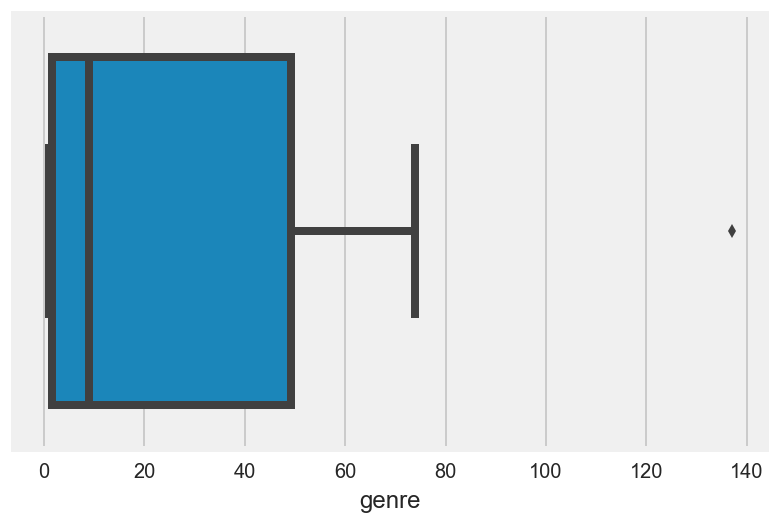

In [103]:
import seaborn as sns
sns.boxplot(billboard_genre)

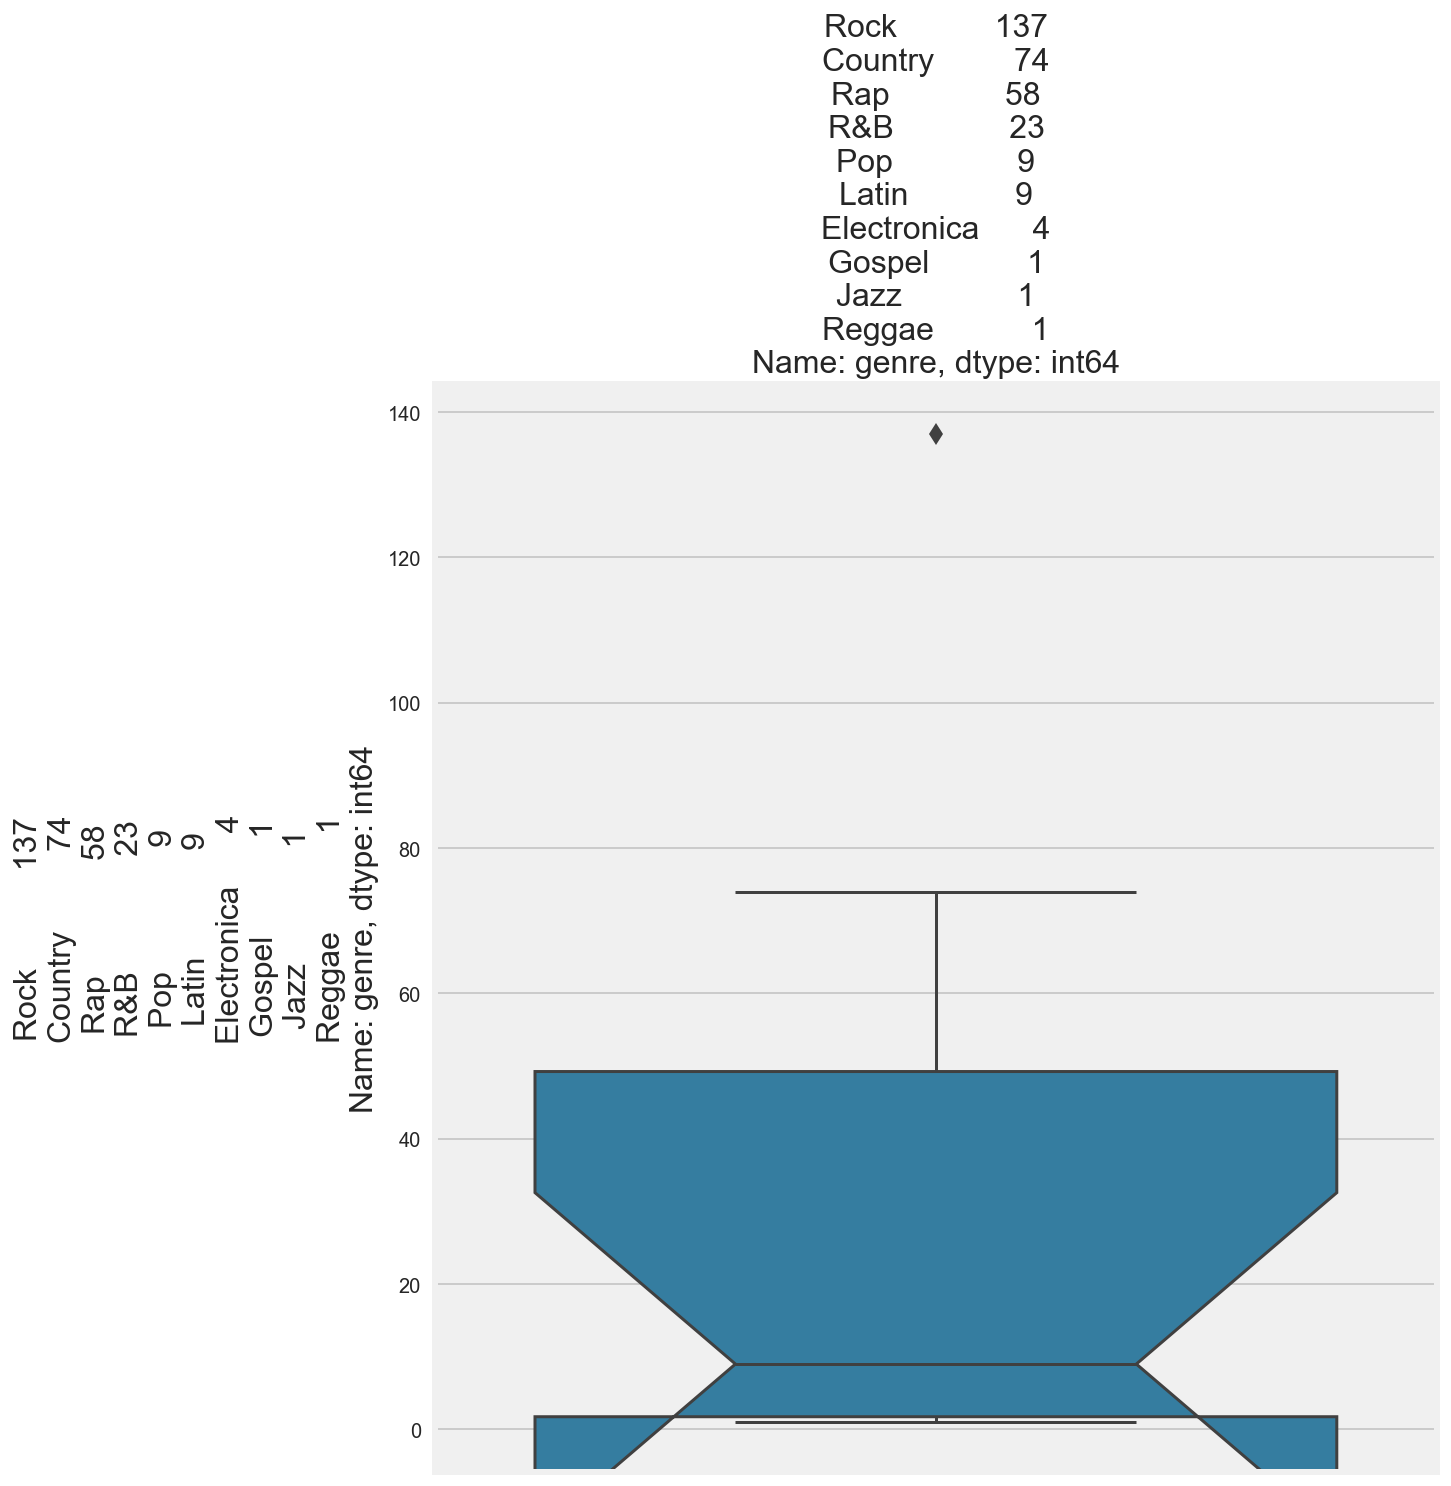

In [106]:
fig=plt.figure(figsize=(8,10))
ax=fig.gca()
ax=sns.boxplot(billboard_genre, orient='v', fliersize=8, linewidth=1.5,notch=True,saturation=0.5,ax=ax)
ax.set_ylabel(billboard_genre, fontsize=16)
ax.set_title(billboard_genre, fontsize=16)
plt.show()

(array([ 6.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.]),
 array([   1. ,   14.6,   28.2,   41.8,   55.4,   69. ,   82.6,   96.2,
         109.8,  123.4,  137. ]),
 <a list of 10 Patch objects>)

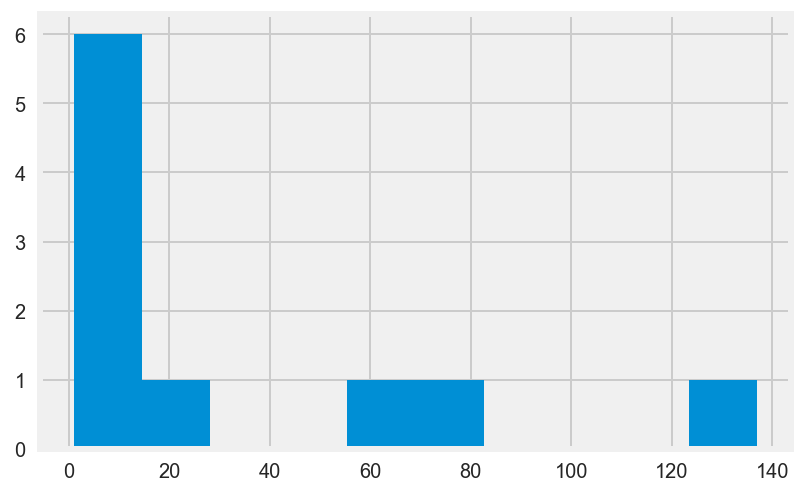

In [110]:
plt.hist(billboard_genre, bins=10)

In [114]:
import matplotlib
matplotlib.pyplot.scatter(rock,hiphop)

matplotlib.pyplot.show()

NameError: name 'rock' is not defined